In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("C:/Users/Nikita/OneDrive/Desktop/Course_Materials/Data Mining Techniques/Assignments/data-mining-techniques/task1_explore/1B_classification/kaggle_data/SaYoPillow.csv")
data.head()
#sr: snoring range of the user
#rr: respiration rate 
#t: body temperature 
#lm: limb movement rate 
#bo: blood oxygen levels 
#rem: eye movement
#sr.1: number of hours of sleep 
#hr: heart rate  
#sl: Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) 

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
# Missing values
data.isna().sum() #no missing values

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [6]:
data.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


array([[<AxesSubplot:title={'center':'sr'}>,
        <AxesSubplot:title={'center':'rr'}>,
        <AxesSubplot:title={'center':'t'}>],
       [<AxesSubplot:title={'center':'lm'}>,
        <AxesSubplot:title={'center':'bo'}>,
        <AxesSubplot:title={'center':'rem'}>],
       [<AxesSubplot:title={'center':'sr.1'}>,
        <AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'sl'}>]], dtype=object)

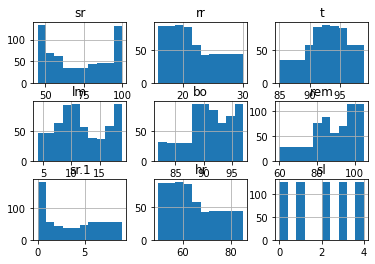

In [7]:
data.hist()

In [8]:
# dimensions of the dataframe
print(data.shape)
print()

# type of each column
print(data.info())

(630, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB
None


In [9]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['sl'], axis=1)
X.head()

,sr,rr,t,lm,bo,rem,sr.1,hr
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12


In [10]:
# Putting response variable to y
y = data['sl']

print(y.head())

0    3
1    3
2    1
3    3
4    0
Name: sl, dtype: int64


In [11]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [13]:
# Rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['sr','rr','t','lm','bo','rem','sr.1','hr']]=scaler.fit_transform(X_train[['sr','rr','t','lm','bo','rem','sr.1','hr']])

X_train.head()

,sr,rr,t,lm,bo,rem,sr.1,hr
616,-0.622358,-0.476661,0.813303,-0.412276,0.937584,-0.301658,0.969540,-0.476661
591,-1.212292,-1.182409,1.302052,-1.284773,1.273357,-1.487659,1.364679,-1.182409
558,1.456185,1.977233,-1.010453,1.661298,-0.976726,1.346118,-1.242722,1.977233
51,-0.901908,-0.752470,0.505573,-0.664743,0.519917,-0.527563,0.615994,-0.752470
241,1.145390,0.987563,-0.322584,1.135943,-0.321561,0.940818,-0.660411,0.987563


In [15]:
scaler = StandardScaler()
X_test[['sl']]=scaler.fit_transform(X_test[['sl']])

X_test.head()

KeyError: "None of [Index(['sl'], dtype='object')] are in the [index]"

In [14]:
# Checking the stress rate
stress = (sum(data['sl'])/len(data['sl'].index))*100
stress

200.0

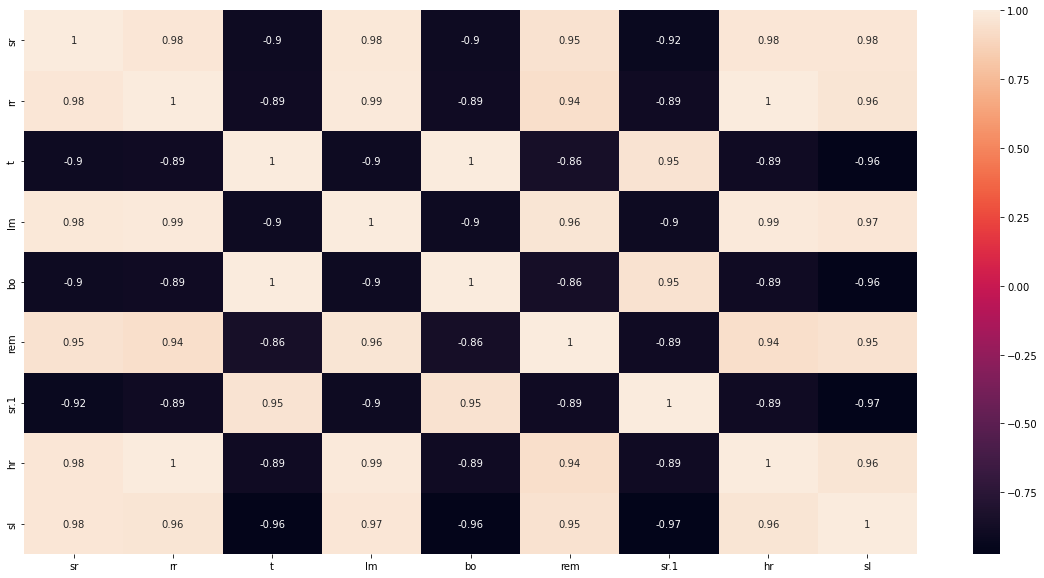

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# correlation matrix 
plt.figure(figsize = (20,10))        # Size of figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [18]:
# Importing libraries to build the moddel
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Niki

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     sl   No. Observations:                  441
Model:                            GLM   Df Residuals:                      433
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Apr 2022   Deviance:                       38730.
Time:                        00:36:19   Pearson chi2:                 5.38e+18
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.332e+16    3.2e+06   4.17e+09      0.000    1.33e+16    1.33e+16
sr          6.081e+15   1.89e+07   3.22e+08      0.000    6.08e+15    6.08e+15
rr          4.138e+15   1.72e+07    2.4e+08      0.000    4.14e+15    4.14e+15
t           1.121e+16   5.86e+07   1.91e+08      0.000    1.12e+16    1.12e+16
lm         -5.053e+15   4.64e+07  -1.09e+08      0.000   -5.05e+15   -5.05e+15
bo         -1.364e+16   5.54e+07  -2.46e+08      0.000   -1.36e+16   -1.36e+16
rem        -5.531e+14   1.78e+07  -3.11e+07      0.000   -5.53e+14   -5.53e+14
sr.1       -3.605e+15   1.46e+07  -2.47e+08      0.000   -3.61e+15   -3.61e+15
hr          4.138e+15   1.72e+07    2.4e+08      0.000    4.14e+15    4.14e+15
==============================================================================
"""

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 5 variables as output
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('sr', True, 1),
 ('rr', False, 4),
 ('t', True, 1),
 ('lm', False, 5),
 ('bo', False, 3),
 ('rem', False, 2),
 ('sr.1', True, 1),
 ('hr', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     sl   No. Observations:                  441
Model:                            GLM   Df Residuals:                      434
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Apr 2022   Deviance:                       74281.
Time:                        00:42:45   Pearson chi2:                 8.20e+18
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sr         -4.032e+17   1.89e+07  -2.13e+10      0.000   -4.03e+17   -4.03e+17
rr          1.809e+17   1.72e+07   1.05e+10      0.000    1.81e+17    1.81e+17
t          -4.895e+17   5.86e+07  -8.36e+09      0.000    -4.9e+17    -4.9e+17
lm         -1.609e+17   4.64e+07  -3.47e+09      0.000   -1.61e+17   -1.61e+17
bo          1.288e+17   5.54e+07   2.32e+09      0.000    1.29e+17    1.29e+17
rem         1.173e+17   1.78e+07    6.6e+09      0.000    1.17e+17    1.17e+17
sr.1        2.218e+17   1.46e+07   1.52e+10      0.000    2.22e+17    2.22e+17
hr          1.809e+17   1.72e+07   1.05e+10      0.000    1.81e+17    1.81e+17
==============================================================================
"""

In [25]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train)
y_train_pred[:10]

C:\Users\Nikita\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


616    1.0
591    0.0
558    1.0
51     1.0
241    0.0
257    0.0
366    0.0
244    0.0
104    1.0
253    0.0
dtype: float64

In [26]:
# Creating a dataframe with the stress level and the predicted probabilities
y_train_pred_final = pd.DataFrame({'sl':y_train.values, 'sl_Prob':y_train_pred})

y_train_pred_final.head()

,sl,sl_Prob
616,1,1.0
591,0,0.0
558,4,1.0
51,1,1.0
241,3,0.0


In [ ]:
# Results may not be correct, should be used for binary result eg. 'Stress' or 'No Stress', but we have sl = [0,1,2,3,4]